## **Корейские кинокартины на международных кинофестивалях 2000-2025 гг. Список награждений**

**Данные содержат следующие признаки:**

* `연도` - Год проведения кинофестиваля
* `영화제` - Название кинофестиваля
* `장르` - Жанр фильма
* `출품작` - Название фильма
* `감독` - Режиссер
* `출품분야` - Номинация
* `수상내역` - Награда
* `수상인` - Награжденный

In [868]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [870]:
import warnings
warnings.filterwarnings('ignore')

In [872]:
raw_data = pd.read_csv('https://raw.githubusercontent.com/xexirina/korean_cinema/refs/heads/main/korean_cinema_awards.csv')
raw_data

,연도,영화제,장르,출품작,감독,출품분야,수상내역,수상인
0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN
1,2005,카이로 국제영화제,일반(종합),댄서의 순정,박영훈,NaN,NaN,NaN
2,2005,케이프타운 세계 영화제,일반(종합),올드보이,박찬욱,A Disparate World,NaN,NaN
3,2005,케이프타운 세계 영화제,일반(종합),사마리아,김기덕,A Disparate World,NaN,NaN
4,2005,케이프타운 세계 영화제,일반(종합),빈집,김기덕,A Disparate World,NaN,NaN
...,...,...,...,...,...,...,...,...
37753,2024,ONE Country ONE 국제 영화제,일반(종합),공작새,변성빈,NaN,NaN,NaN
37754,2024,네팔 국제영화제,일반(종합),공작새,변성빈,NaN,NaN,NaN
37755,2024,머내마을영화제,일반(종합),연필과 색종이,NaN,NaN,NaN,NaN
37756,2024,Fairy Tales 퀴어영화제,일반(종합),공작새,변성빈,NaN,NaN,NaN


**Для удобства изменим названия колонок на их эквивалетны на английском языке**
* `Year` - Год проведения кинофестиваля
* `Fest Name` - Название кинофестиваля
* `Genre` - Жанр фильма
* `Film` - Название фильма
* `Director` - Режиссер
* `Nomination` - Номинация
* `Award` - Награда
* `Winner` - Награжденный

  
Таким образом, наш датасет теперь выглядит следующим образом:

In [874]:
raw_data.columns = ['Year', 'Fest Name', 'Genre', 'Film', 'Director', 'Nomination', 'Award', 'Winner']
raw_data.head()

,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN
1,2005,카이로 국제영화제,일반(종합),댄서의 순정,박영훈,NaN,NaN,NaN
2,2005,케이프타운 세계 영화제,일반(종합),올드보이,박찬욱,A Disparate World,NaN,NaN
3,2005,케이프타운 세계 영화제,일반(종합),사마리아,김기덕,A Disparate World,NaN,NaN
4,2005,케이프타운 세계 영화제,일반(종합),빈집,김기덕,A Disparate World,NaN,NaN


In [875]:
raw_data['Year'].unique() # проверим что в датасете есть данные за все года (2000-2025 гг.)

array([2005, 2004, 2003, 2002, 2001, 2000, 2010, 2009, 2008, 2007, 2006,
       2013, 2012, 2011, 2015, 2014, 2016, 2017, 2018, 2019, 2021, 2020,
       2023, 2022, 2025, 2024])

## **Датасет содержит следующие типы переменных:**

* Год проведения кинофестиваля - категориальная номинальная
* Название кинофестиваля - категориальная номинальная
* Жанр фильма - категориальная номинальная
* Название фильма - категориальная номинальная
* Режиссер - категориальная номинальная
* Номинация - категориальная номинальная
* Награда - категориальная номинальная
* Награжденный - категориальная номинальная

Не очень большое разнообразие) но позже мы расчитаем на основе этих данных числовые показатели

In [877]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37758 entries, 0 to 37757
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        37758 non-null  int64 
 1   Fest Name   37758 non-null  object
 2   Genre       37684 non-null  object
 3   Film        37613 non-null  object
 4   Director    35344 non-null  object
 5   Nomination  31965 non-null  object
 6   Award       6266 non-null   object
 7   Winner      5229 non-null   object
dtypes: int64(1), object(7)
memory usage: 2.3+ MB


## **Работа с пропусками**

In [879]:
raw_data.head(3)

,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN
1,2005,카이로 국제영화제,일반(종합),댄서의 순정,박영훈,NaN,NaN,NaN
2,2005,케이프타운 세계 영화제,일반(종합),올드보이,박찬욱,A Disparate World,NaN,NaN


In [880]:
raw_data.isna().mean()

Year          0.000000
Fest Name     0.000000
Genre         0.001960
Film          0.003840
Director      0.063933
Nomination    0.153424
Award         0.834048
Winner        0.861513
dtype: float64

In [881]:
print(f'В каждом из столбцов следущее кол-во пропусков: \n{raw_data.isna().sum()}')
print(f'\n')
print(f'Что в процентном соотношении составляет: \n{raw_data.isna().mean()*100}')

В каждом из столбцов следущее кол-во пропусков: 
Year              0
Fest Name         0
Genre            74
Film            145
Director       2414
Nomination     5793
Award         31492
Winner        32529
dtype: int64


Что в процентном соотношении составляет: 
Year           0.000000
Fest Name      0.000000
Genre          0.195985
Film           0.384025
Director       6.393347
Nomination    15.342444
Award         83.404841
Winner        86.151279
dtype: float64


### Удаление пропусков
**По правилу, мы должны удалить колонку, если в ней больше `40%` пропусков.**

**Т.е. в нашем случае, необходимо удалить колонки `Award` и `Winner`**

Однако такие данные представляют мало интереса в рамках нашего исследования (нам интересны награды), поэтому поступим следующим образом: оставим только те строки датасета, в которых значения столбцов **`Award`** и **`Winner`** **НЕ**пустые и сохраним копию в отдельный датафрейм **`df`**

In [884]:
df = raw_data.dropna(subset = ['Award', 'Winner']).copy()
df.head()

,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
17,2005,디렉터스 컷 어워즈,일반(종합),너는 내 운명,박진표,NaN,올해의 여자배우상,전도연
18,2005,디렉터스 컷 어워즈,일반(종합),친절한 금자씨,박찬욱,NaN,올해의 여자배우상,이영애
19,2005,디렉터스 컷 어워즈,일반(종합),태풍태양,정재은,NaN,올해의 새로운 여자배우상,조이진
20,2005,디렉터스 컷 어워즈,일반(종합),말아톤,정윤철,NaN,올해의 신인 감독상,정윤철
21,2005,디렉터스 컷 어워즈,일반(종합),웰컴 투 동막골,박광현,NaN,올해의 남자배우상,정재영


**Полученные данные вновь проверим на долю пропущенных значений и увидим, что в колонке `Nomination` более 50% пропусков**

**-> удалим колонку**


In [886]:
 df.drop('Nomination', axis=1, inplace=True)

**Наконец у нас получился итоговый датасет, который можно начать анализировать**

In [888]:
df.head(3)

,Year,Fest Name,Genre,Film,Director,Award,Winner
17,2005,디렉터스 컷 어워즈,일반(종합),너는 내 운명,박진표,올해의 여자배우상,전도연
18,2005,디렉터스 컷 어워즈,일반(종합),친절한 금자씨,박찬욱,올해의 여자배우상,이영애
19,2005,디렉터스 컷 어워즈,일반(종합),태풍태양,정재은,올해의 새로운 여자배우상,조이진


## **Описательные статистики**

**Так как наши данные - категориальные номинальные, сначала посчитаем моду для колонок `Fest Name`, `Genre`, `Director` и `Winner`, чтобы узнать чаще всего встречающиеся названия фестиваля, жанра, режиссера и имя победителя, соответственно**

In [892]:

top_fest = raw_data['Fest Name'].mode().values[0]
print(f'Больше всего в датасете записей с фестиваля: {top_fest}') # находим самый частотный фестиваль среди всех данных
print(f'Кол-во записей: {raw_data[raw_data["Fest Name"] == top_fest].shape[0]}') # считаем кол-во упоминаний
print(f'Кол-во уникальных картин, представленных на этом фестивале: {raw_data[raw_data["Fest Name"] == top_fest]["Film"].nunique()}')

Больше всего в датасете записей с фестиваля: 서울독립영화제
Кол-во записей: 1613
Кол-во уникальных картин, представленных на этом фестивале: 1557


In [893]:
top_fest_byaw_num = df['Fest Name'].mode().values[0]
print(f'Больше всего наград получено на фестивале: {top_fest_byaw_num}') # находим самый частотный фестиваль среди данных о награждении кор фильмов
print(f'Кол-во записей: {df[df["Fest Name"] == top_fest_byaw_num].shape[0]}') # считаем кол-во упоминаний
print(f'Из низ уникальных картин: {raw_data[raw_data["Fest Name"] == top_fest_byaw_num]["Film"].nunique()}')

Больше всего наград получено на фестивале: 청룡영화상
Кол-во записей: 396
Из низ уникальных картин: 239


In [899]:
print(raw_data['Genre'].mode().values[0]) # находим самый популярный жанр в обоих датафремах
print(df['Genre'].mode().values[0])

일반(종합)
일반(종합)


In [906]:
top_dir_raw = raw_data['Director'].mode().values[0]
print(f'Чаще всего на фестивалях были представлены фильмы режиссера {top_dir_raw}')
print(f'Процент его успешных картин: ' # посчитаем сколько из всех представленных им фильмов получили награду (%)
      f'{round(df[df["Director"] == top_dir_raw].shape[0] / raw_data[raw_data["Director"] == top_dir_raw].shape[0] * 100, 2)} %')

Чаще всего на фестивалях были представлены фильмы режиссера 홍상수
Процент его успешных картин: 6.66 %


In [907]:
top_dir_award = df['Director'].mode().values[0]
print(f'Самый успешный режиссер: {top_dir_award}')

Самый успешный режиссер: 봉준호


In [908]:
print(f'Обладатель наибольшего кол-ва наград: {raw_data["Winner"].mode().values[0]}')
# находим обладателя наибольшего кол-ва наград (одинаково для обоих сетов, поэтому не дублируем)

Обладатель наибольшего кол-ва наград: 봉준호


In [910]:
best_dir_filmography = raw_data[raw_data["Director"] == top_dir_award]["Film"].unique()
print(f'Фильмы самого успешного режиссера: {(", ").join(best_dir_filmography)}; всего {len(best_dir_filmography)} шт.')
print(f'Из них награды получили следующие фильмы: {(", ").join(df[df["Director"] == top_dir_award]["Film"].unique())}, '
      f'{df[df["Director"] == top_dir_award]["Film"].nunique()} шт.')


Фильмы самого успешного режиссера: 살인의 추억, 괴물, 플란다스의 개, 마더, 인플루엔자, 지리멸렬, 설국열차, 기생충; всего 8 шт.
Из них награды получили следующие фильмы: 살인의 추억, 플란다스의 개, 마더, 괴물, 설국열차, 기생충, 6 шт.


In [914]:
print(f'Всего работы самого титулованного режиссера получили {df[df["Director"] == top_dir_award]["Film"].count()} наград ',
      f'\n{df[df["Director"] == top_dir_award]["Film"].value_counts()}')

Всего работы самого титулованного режиссера получили 148 наград  
Film
기생충        76
살인의 추억     24
괴물         19
마더         18
설국열차        8
플란다스의 개     3
Name: count, dtype: int64


### **Итак, мы узнали, что:**

* наибольшее количество корейских фильмов за рассматриваемый период было представлено на Seoul Independent Film Festival (**서울독립영화제**) — **`1557`** картин;
* за последние 25 лет корейские фильмы чаще всего получали награды на кинопремии "Голубой дракон" (**청룡영화상**) — **`396`** раз;
* самыми популярными среди фильмов, получивших награды, стали коммерческие (**일반(종합)**) фильмы;
* чаще всего на фестивалях участвовали фильмы, снятые режиссером Хон Сансу (**홍상수**), однако только **`6,66%`** из них были удостоены наград;
* больше всего наград получили фильмы, снятые режиссёром Пон Чжунхо (**봉준호**). Он же стал самым **титулованным** участником, завоевав **`67`** наград (предположительно, это премии за лучшую режиссёрскую работу (감독상) или за лучший сценарий (각본상) — точнее узнаем позже, обратившись к колонке **`Award`**);
* самым высоко оцененным фильмом стали **"Паразиты" (기생충)**, удостоившиеся **`76`** наград.

## **Для дальнейшего анализа необходимо создать дополнительные количественные признаки, расчитанные на основе имеющихся категориальных данных**

**Создадим таблицу с данными по годам на основе имеющихся датафреймов.**  

В таблице будут следующие показатели:  

- **`Awards`** – количество фильмов, номинированных в этом году.  
- **`Winners`** – общее число наград, полученных фильмами за год.  
- **`Win_to_Aw`** – отношение побед к номинациям.  
- **`Rec_num`** – количество записей об участии в фестивалях.
- **`Fest_Unum`** – количество уникальных фестивалей, проведенных в этом году.
- **`Film_UNnum`** – количество уникальных фильмов, представленных на фестивалях.
- **`Best_Director`** (**BDA**) – режиссёр, получивший больше всего наград в этом году.  
- **`BDA_num`** – количество наград, полученных **Best_Director** за год.
- **`BDAll_num`** – количество фильмов **Best_Director**, участвующих в фестивалях за год.
- **`BDALL_AW_Ration`** – отношение фильмов **Best_Director**, получивших награду к обшему число его фильмах, участвующих в этом году (`BDA_num / BDAll_num`).
- **`BDA_Share`** – доля наград **Best_Director** от общего числа наград за год (`BDA_num / Winners`).  
- **`Most_Shown_Director`** (**MSD**) – режиссёр, чьи фильмы чаще всего участвовали в фестивалях в этом году (независимо от наград).  
- **`MSDW_num`** – количество фильмов **Most_Shown_Director**, представленных на фестивалях.  
- **`MSDW_Share`** – доля фильмов **Most_Shown_Director** от общего числа номинированных фильмов (`MSDW_num / Awards`).  


In [920]:
yearly_aw = raw_data.groupby('Year')[['Award', 'Winner']].count()
yearly_aw['Rec_num'] = raw_data.groupby('Year')['Fest Name'].count()
yearly_aw['Fest_Unum'] = raw_data.groupby('Year')['Fest Name'].nunique()
yearly_aw['Film_UNnum'] = raw_data.groupby('Year')['Film'].nunique()
yearly_aw['Best_Director'] = df.groupby('Year')['Director'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
yearly_aw['Most_Shown_Director'] = raw_data.groupby('Year')['Director'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

yearly_aw['BDA_num'] = yearly_aw.apply(
    lambda row: raw_data[(raw_data['Year'] == row.name) & (raw_data['Director'] == row['Best_Director']) & (raw_data['Winner'].isna()==False)].shape[0], axis=1
) # BDA_num == Best_Director_Awards_num

yearly_aw['BDAll_num'] = yearly_aw.apply(
    lambda row: raw_data[(raw_data['Year'] == row.name) & (raw_data['Director'] == row['Best_Director'])].shape[0], axis=1
) # BDAll_num == Best_Director_All_entries_num

yearly_aw['MSDW_num'] = yearly_aw.apply(
    lambda row: raw_data[(raw_data['Year'] == row.name) & (raw_data['Director'] == row['Most_Shown_Director'])].shape[0], axis=1
) # MSDW_num == Most_Shown_Director_Works_num

yearly_aw['Win_to_Aw'] = yearly_aw['Winner'] / yearly_aw['Award']
yearly_aw['BDA_Share'] = yearly_aw['BDA_num'] / yearly_aw['Winner']
yearly_aw['MSDW_Share'] = yearly_aw['MSDW_num'] / yearly_aw['Film_UNnum']
yearly_aw['BDALL_AW_Ration'] = yearly_aw['BDA_num'] / yearly_aw['BDAll_num']

yearly_aw = yearly_aw[['Award', 'Winner', 'Win_to_Aw', 'Rec_num', 'Fest_Unum', 'Film_UNnum', 'Best_Director', 'BDAll_num', 'BDA_num',
                       'BDALL_AW_Ration', 'BDA_Share', 'Most_Shown_Director', 'MSDW_num', 'MSDW_Share']]
yearly_aw.columns = ['Awards', 'Winners', 'Win_to_Aw', 'Rec_num', 'Fest_Unum', 'Film_UNnum', 'Best_Director', 'BDAll_num', 'BDA_num',
                     'BDALL_AW_Ration', 'BDA_Share', 'Most_Shown_Director', 'MSDW_num', 'MSDW_Share']


yearly_aw.head() # надо посчитать сколько раз встречался каждый реж и построить график


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2000,85,70,0.823529,354,122,111,박찬욱,15,13,0.866667,0.185714,이창동,20,0.180180
2001,79,68,0.860759,354,91,118,정재은,9,9,1.000000,0.132353,김기덕,36,0.305085
2002,96,86,0.895833,362,105,110,이창동,19,14,0.736842,0.162791,김기덕,48,0.436364
2003,135,108,0.800000,530,182,147,봉준호,31,23,0.741935,0.212963,봉준호,31,0.210884
2004,153,126,0.823529,581,168,183,박찬욱,52,34,0.653846,0.269841,김기덕,54,0.295082


### Теперь посчитаем описательные статистики для полученных числовых данных

In [922]:
print(f'В среднем за год в номинации попадало {round(yearly_aw["Awards"].mean())} корейских фильмов')
print(f'В среднем за год корейские авторы забирали по {round(yearly_aw["Winners"].mean())} наград')
print(f'В среднем за год появлялось по {round(yearly_aw["Rec_num"].mean())} записей')
print(f'В среднем за год проводилось {round(yearly_aw["Fest_Unum"].mean())} фестивалей')

В среднем за год в номинации попадало 241 корейских фильмов
В среднем за год корейские авторы забирали по 201 наград
В среднем за год появлялось по 1452 записей
В среднем за год проводилось 234 фестивалей


## **Изучение признаков**

У нас есть два датафрейма: **`raw_data`** и **`df`**.

* `raw_data` содержит информацию обо всех фильмах, представленных на различных кинофестивалях с 2000 по 2025 год.
* `df` включает только те фильмы, которые получили награды на этих фестивалях.


Логично рассмотреть данные с **двух** сторон:

1.   Сравнить оба датафрейма, чтобы понять, чем награжденные фильмы отличаются от остальных.
2.   Проанализировать каждый датафрейм отдельно, выявляя закономерности внутри них


### Категориальные данные

In [928]:
raw_data.head(2)

,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN
1,2005,카이로 국제영화제,일반(종합),댄서의 순정,박영훈,NaN,NaN,NaN


In [930]:
print(f'Всего за 25 лет зафиксированы данные о {raw_data["Director"].nunique()} южнокорейских режиссерах, представивших свои фильмы на международных фестивалях')
print(f'Картины только {df["Director"].nunique()} из них были удостоены наград')
print(f'\nТаким образом, {raw_data["Director"].nunique() - df["Director"].nunique()} киноделов не получили международного признания своих работ')

Всего за 25 лет зафиксированы данные о 5244 южнокорейских режиссерах, представивших свои фильмы на международных фестивалях
Картины только 1459 из них были удостоены наград

Таким образом, 3785 киноделов не получили международного признания своих работ


In [932]:
print(f'Количество уникальных наименований фестивалей: {raw_data["Fest Name"].nunique()}') # количество уникальных наименований фестивалей
print(f'Количество уникальных наименований фестивалей, на которых были награждены кор. фильмы: {df["Fest Name"].nunique()}')

Количество уникальных наименований фестивалей: 1303
Количество уникальных наименований фестивалей, на которых были награждены кор. фильмы: 401


In [934]:
print(f'Топ-10 фестивалей по кол-ву записей о фильмах, представленных на них за 25 лет: ',
      f'\n{raw_data["Fest Name"].value_counts().head(10)}') # Топ-5 фестивалей по кол-во записей о фильмах, представленных на них за 25 лет

print(f'\n')

print(f'Топ-10 фестивалей, на которых высоко ценятся корейские картины: ',
      f'\n{df["Fest Name"].value_counts().head(10)}')

Топ-10 фестивалей по кол-ву записей о фильмах, представленных на них за 25 лет:  
Fest Name
서울독립영화제        1613
부천국제판타스틱영화제    1096
부산국제영화제        1045
전주국제영화제         895
서울국제여성영화제       674
피렌체 한국영화제       625
대단한 단편영화제       587
미쟝센 단편영화제       528
대구단편영화제         519
정동진독립영화제        483
Name: count, dtype: int64


Топ-10 фестивалей, на которых высоко ценятся корейские картины:  
Fest Name
청룡영화상         396
한국영화평론가협회상    239
대종상영화제        225
백상예술대상        221
황금촬영상 시상식     185
부일영화상         175
부산영화평론가협회상    167
디렉터스 컷 어워즈    159
서울독립영화제       149
춘사영화제         147
Name: count, dtype: int64


In [936]:
raw_data['Film'].nunique() # кол-во уникальных фильмов, представленных на фестивалях за последние 25 лет

11103

In [938]:





df['Film'].nunique() # кол-во уникальных фильмов, награжденных на фестивалях за последние 25 лет

2101

In [940]:
print(raw_data['Genre'].nunique())  # надо построить что-то и принять решение о полезности данных, тк в большинстве случаев как будто просто писали 일반(종합)
print(", ".join(map(str, raw_data['Genre'].unique())))

10
일반(종합), 독립, 청소년, nan, 단편, 애니, 기타, 판타지, 퀴어, 호러/스릴러, 다큐


In [942]:
dir_intersection = list(pd.Index(yearly_aw["Best_Director"]).intersection(pd.Index(yearly_aw["Most_Shown_Director"])))

print(f'Режиссеры, оказавшиеся за эти годы и в категории самых успешных и самых часто появляюзихся: ',
 f'\n{(", ").join(dir_intersection)}')

Режиссеры, оказавшиеся за эти годы и в категории самых успешных и самых часто появляюзихся:  
이창동, 봉준호, 나홍진, 양우석, 장재현


### Числовые данные

In [945]:
print(f'Меньше всего номинаций у корейских фильмов было в {yearly_aw.idxmin()["Awards"]} '
      f'г. — {yearly_aw["Awards"].min()} шт.')
print(f'Больше всего номинаций у корейских фильмов было в {yearly_aw.idxmax()["Awards"]} '
      f'г. — {yearly_aw["Awards"].max()} шт.')

Меньше всего номинаций у корейских фильмов было в 2025 г. — 16 шт.
Больше всего номинаций у корейских фильмов было в 2018 г. — 613 шт.


In [947]:
print(f'Меньше всего наград корейские фильмы получили в {yearly_aw.idxmin()["Winners"]} '
      f'г. — {yearly_aw["Winners"].min()} шт.')
print(f'Больше всего наград корейские фильмы получили в  {yearly_aw.idxmax()["Winners"]} '
      f'г. — {yearly_aw["Winners"].max()} шт.')


Меньше всего наград корейские фильмы получили в 2025 г. — 16 шт.
Больше всего наград корейские фильмы получили в  2018 г. — 573 шт.


In [949]:
print(f'Меньше всего записей - {yearly_aw["Rec_num"].min()} шт. - было сделано в {yearly_aw.idxmin()["Rec_num"]} г.')
print(f'Наибольшая активность корейских кинематографистов на фестивалях была в {yearly_aw.idxmax()["Rec_num"]} '
      f'г., \nтогда было сделано {yearly_aw["Rec_num"].max()} записей об участии фильмов в фестивалях')

Меньше всего записей - 93 шт. - было сделано в 2025 г.
Наибольшая активность корейских кинематографистов на фестивалях была в 2019 г., 
тогда было сделано 3338 записей об участии фильмов в фестивалях


In [951]:
print(f'Меньше всего фестивалей было проведено в {yearly_aw.idxmin()["Fest_Unum"]} '
      f'г. — {yearly_aw["Fest_Unum"].min()} шт.')
print(f'Больше всего фестивалей было проведено в {yearly_aw.idxmax()["Fest_Unum"]} '
      f'г. — {yearly_aw["Fest_Unum"].max()} шт.')

# здесь надо понимать, что это условная запись, тк речь идет только о фестивалях,
# на которых участвовали кор фильмы

Меньше всего фестивалей было проведено в 2025 г. — 18 шт.
Больше всего фестивалей было проведено в 2021 г. — 407 шт.


In [953]:
df

,Year,Fest Name,Genre,Film,Director,Award,Winner
17,2005,디렉터스 컷 어워즈,일반(종합),너는 내 운명,박진표,올해의 여자배우상,전도연
18,2005,디렉터스 컷 어워즈,일반(종합),친절한 금자씨,박찬욱,올해의 여자배우상,이영애
19,2005,디렉터스 컷 어워즈,일반(종합),태풍태양,정재은,올해의 새로운 여자배우상,조이진
20,2005,디렉터스 컷 어워즈,일반(종합),말아톤,정윤철,올해의 신인 감독상,정윤철
21,2005,디렉터스 컷 어워즈,일반(종합),웰컴 투 동막골,박광현,올해의 남자배우상,정재영
...,...,...,...,...,...,...,...
37740,2024,충남 전국대학영화제,일반(종합),골디락스존 프로젝트,김정수,대상,김정수
37741,2024,충남 전국대학영화제,일반(종합),꿈이라도 좋아,반유진,시나리오상,반유진
37742,2024,누벨바그영화제,일반(종합),수능을 치려면,김선빈,최우수상,김선빈
37743,2024,꽃심어린이청소년영화제,일반(종합),수능을 치려면,김선빈,꽃심상,김선빈


In [955]:
df[df['Year'] == 2018]['Film'].value_counts()


Film
1987            24
공작              21
신과함께-죄와 벌       13
소공녀             12
버닝              11
                ..
핑크페미             1
프리즌              1
짧은 사이에           1
앞이 보이지 않는 화가     1
2박 3일            1
Name: count, Length: 291, dtype: int64

In [956]:
print(f'Меньше всего уникальных фильмов было показано в {yearly_aw.idxmin()["Film_UNnum"]} '
      f'г. — {yearly_aw["Film_UNnum"].min()} шт.')
print(f'Больше всего уникальных фильмов было показано в {yearly_aw.idxmax()["Film_UNnum"]} '
      f'г. — {yearly_aw["Film_UNnum"].max()} шт.')

Меньше всего уникальных фильмов было показано в 2025 г. — 76 шт.
Больше всего уникальных фильмов было показано в 2024 г. — 1607 шт.


In [959]:
# надо будет посмотреть что там в 2001 году

## **Выбросы и ошибки**

In [962]:
yearly_aw.head(2)

,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2000,85,70,0.823529,354,122,111,박찬욱,15,13,0.866667,0.185714,이창동,20,0.180180
2001,79,68,0.860759,354,91,118,정재은,9,9,1.000000,0.132353,김기덕,36,0.305085


In [964]:
q1_awards = yearly_aw['Awards'].quantile(0.25)
q3_awards = yearly_aw['Awards'].quantile(0.75)
iqr = q3_awards - q1_awards
lower_bound = q1_awards - 1.5 * iqr
upper_bound = q3_awards + 1.5 * iqr
print(lower_bound, upper_bound)

yearly_aw[(yearly_aw['Awards'] > upper_bound) | (yearly_aw['Awards'] < lower_bound)] # ура выброс

-135.0 593.0


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2018,613,573,0.934747,3310,402,1578,장준환,39,24,0.615385,0.041885,홍상수,86,0.054499


In [965]:
q1_wa = yearly_aw['Win_to_Aw'].quantile(0.25)
q3_wa = yearly_aw['Win_to_Aw'].quantile(0.75)
iqr_wa = q3_wa - q1_wa
lower_bound_wa = q1_wa - 1.5 * iqr_wa
upper_bound_wa = q3_wa + 1.5 * iqr_wa
print(lower_bound_wa, upper_bound_wa)

yearly_aw[(yearly_aw['Win_to_Aw'] < lower_bound_wa) |(yearly_aw['Win_to_Aw'] > upper_bound_wa)] # выброс

0.6679951504932208 1.0356943570211028


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2022,386,179,0.463731,2474,321,1220,이수학,20,20,1.0,0.111732,홍상수,63,0.051639


In [966]:
q1_bda_share = yearly_aw['BDA_Share'].quantile(0.25)
q3_bda_share = yearly_aw['BDA_Share'].quantile(0.75)
iqr_bda = q3_bda_share - q1_bda_share
lower_bound_bda = q1_bda_share - 1.5 * iqr_bda
upper_bound_bda = q3_bda_share + 1.5 * iqr_bda
print(lower_bound_bda, upper_bound_bda)

yearly_aw[(yearly_aw['BDA_Share'] < lower_bound_bda)|(yearly_aw['BDA_Share'] > upper_bound_bda)] # 2025 год выброс

-0.05485542498051696 0.2924130355938389


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2025,16,16,1.0,93,18,76,장재현,12,11,0.916667,0.6875,장재현,12,0.157895


In [970]:
avg_bda_share = yearly_aw['BDA_Share'].mean()
std_bda_share = yearly_aw['BDA_Share'].std()
print(avg_bda_share, std_bda_share)

lower_bound_bda_share = avg_bda_share - 2 * std_bda_share
upper_bound_bda_share = avg_bda_share + 2 * std_bda_share
print(lower_bound_bda_share, upper_bound_bda_share)

yearly_aw[(yearly_aw['BDA_Share'] < lower_bound_bda_share) | (yearly_aw['BDA_Share'] > upper_bound_bda_share)]
# наконец можем официально избавиться от 2025 г.
# мешает нашей статистике, тк очень высокое отношение работ лучшего режиссера ко всем наград из-за маленького кол-ва наблюдений

0.1346877882162831 0.12843995691809776
-0.12219212561991241 0.3915677020524786


,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2025,16,16,1.0,93,18,76,장재현,12,11,0.916667,0.6875,장재현,12,0.157895


In [972]:
raw_data.drop(raw_data[raw_data['Year'] == 2025].index, inplace=True)
raw_data['Year'].unique() # убедимся, что данных за 2025 год больше нет

array([2005, 2004, 2003, 2002, 2001, 2000, 2010, 2009, 2008, 2007, 2006,
       2013, 2012, 2011, 2015, 2014, 2016, 2017, 2018, 2019, 2021, 2020,
       2023, 2022, 2024])

## **Анализ корреляций**

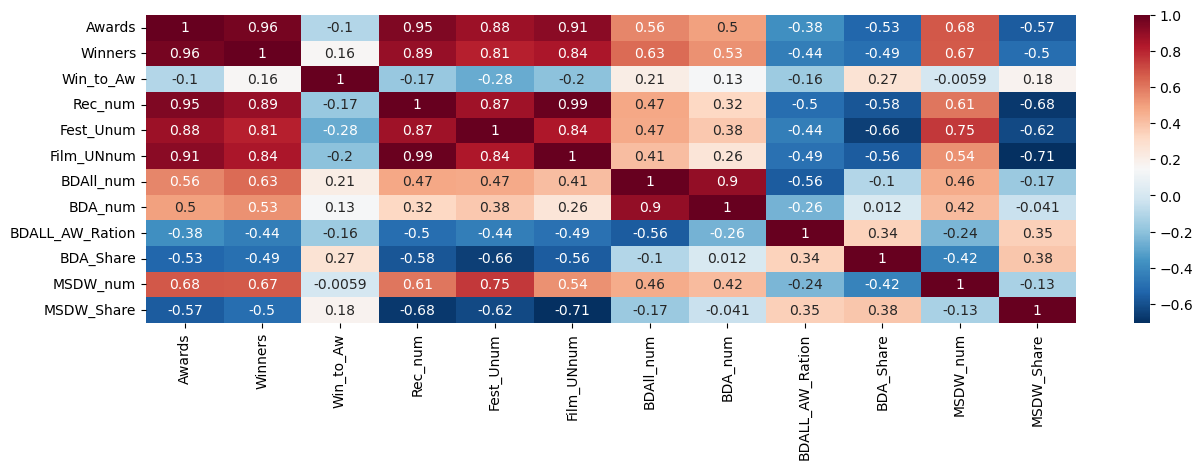

In [974]:
plt.figure(figsize=(15, 4))
sns.heatmap(yearly_aw.corr(numeric_only = True), annot=True, cmap='RdBu_r')
plt.show()

**Проанализируем матрицу корелляций**

По матрице можно заметить:
* сильную положительную корелляцию между кол-вом номинаций  **`Awards`**, наград **`Winners`** и кол-вом проводимых фестивалей **`Fest_Unum`**, представленных фильмов **`Film_UNnum`** *-> (прямая линейная взаимосвязь)*

* сильную отрицательную корелляцию между кол-вом записей **`Rec_num`**, уникальных фильмов **`Film_UNnum`** и долей, которую от них занимают данные о фильмах топ-режиссеров данного года **`(BDA_Share)`** (чем больше фильмов, тем меньшую долю из низ составляют фильмы самого успешного автора) *-> (обратная линейная взаимосвязь)*

## **Визуализация данных**

In [978]:
yearly_aw.head()

,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
Year,,,,,,,,,,,,,,
2000,85,70,0.823529,354,122,111,박찬욱,15,13,0.866667,0.185714,이창동,20,0.180180
2001,79,68,0.860759,354,91,118,정재은,9,9,1.000000,0.132353,김기덕,36,0.305085
2002,96,86,0.895833,362,105,110,이창동,19,14,0.736842,0.162791,김기덕,48,0.436364
2003,135,108,0.800000,530,182,147,봉준호,31,23,0.741935,0.212963,봉준호,31,0.210884
2004,153,126,0.823529,581,168,183,박찬욱,52,34,0.653846,0.269841,김기덕,54,0.295082


In [980]:
yearly_aw = yearly_aw.drop(2025)

<Axes: >

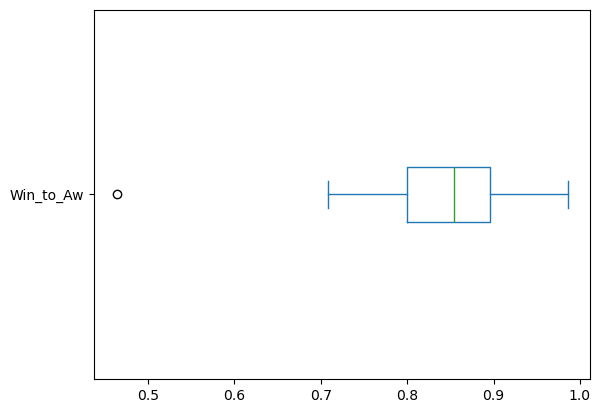

In [983]:
yearly_aw['Win_to_Aw'].plot(kind = 'box', vert = False) # нашли выброс

In [985]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

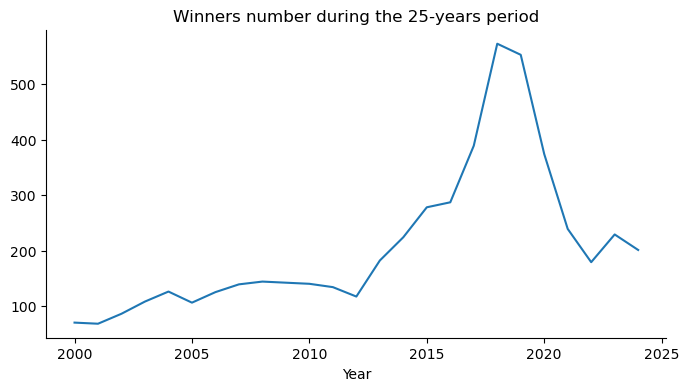

In [987]:
yearly_aw['Winners'].plot(kind='line', figsize=(8, 4), title='Winners number during the 25-years period')
plt.gca().spines[['top', 'right']].set_visible(False)

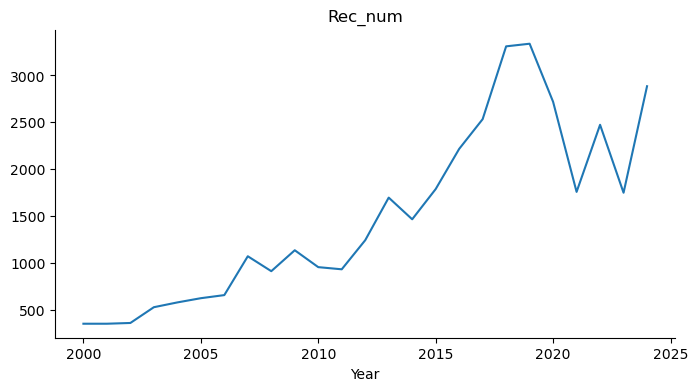

In [993]:

yearly_aw['Rec_num'].plot(kind='line', figsize=(8, 4), title='Rec_num')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='BDA_Share', ylabel='Fest_Unum'>

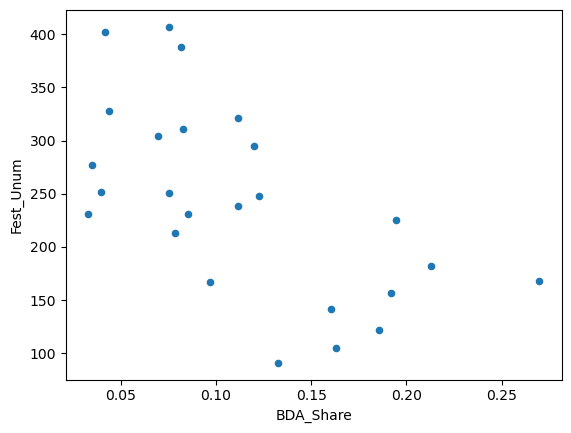

In [995]:
yearly_aw.plot('BDA_Share', 'Fest_Unum', kind = "scatter")

<Axes: xlabel='Rec_num', ylabel='Film_UNnum'>

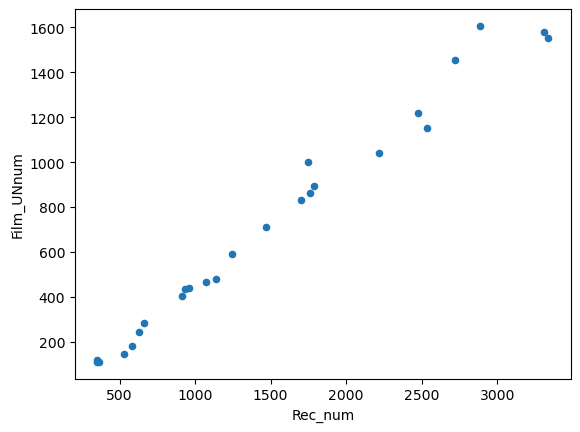

In [997]:
yearly_aw.plot('Rec_num', 'Film_UNnum', kind = "scatter")


<Axes: ylabel='Frequency'>

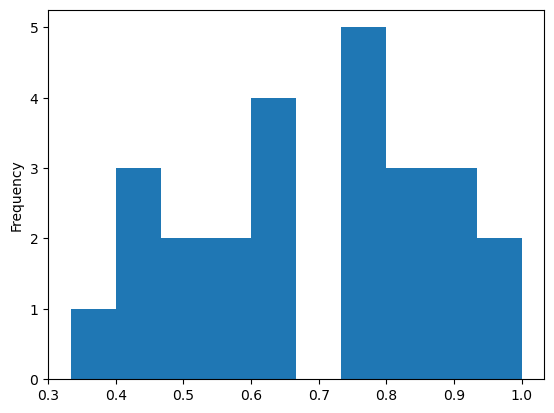

In [999]:
yearly_aw['BDALL_AW_Ration'].plot(kind='hist')

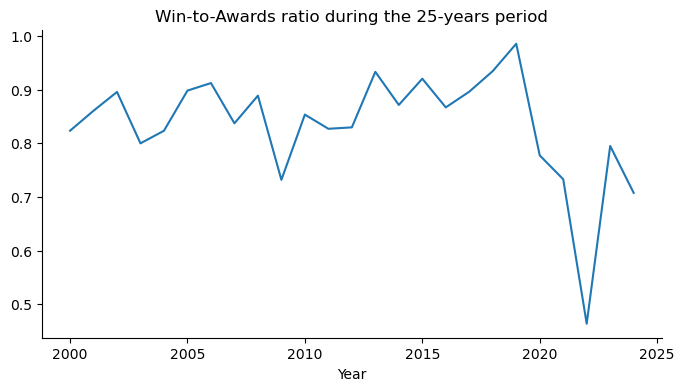

In [1003]:
yearly_aw['Win_to_Aw'].plot(kind='line', figsize=(8, 4), title='Win-to-Awards ratio during the 25-years period')
plt.gca().spines[['top', 'right']].set_visible(False)

In [1005]:
top_10 = df['Director'].value_counts()[:10]
top_10

Director
봉준호    148
박찬욱    108
이준익    105
이창동     66
김보라     54
홍상수     54
나홍진     53
김용화     50
윤종빈     49
김지운     49
Name: count, dtype: int64

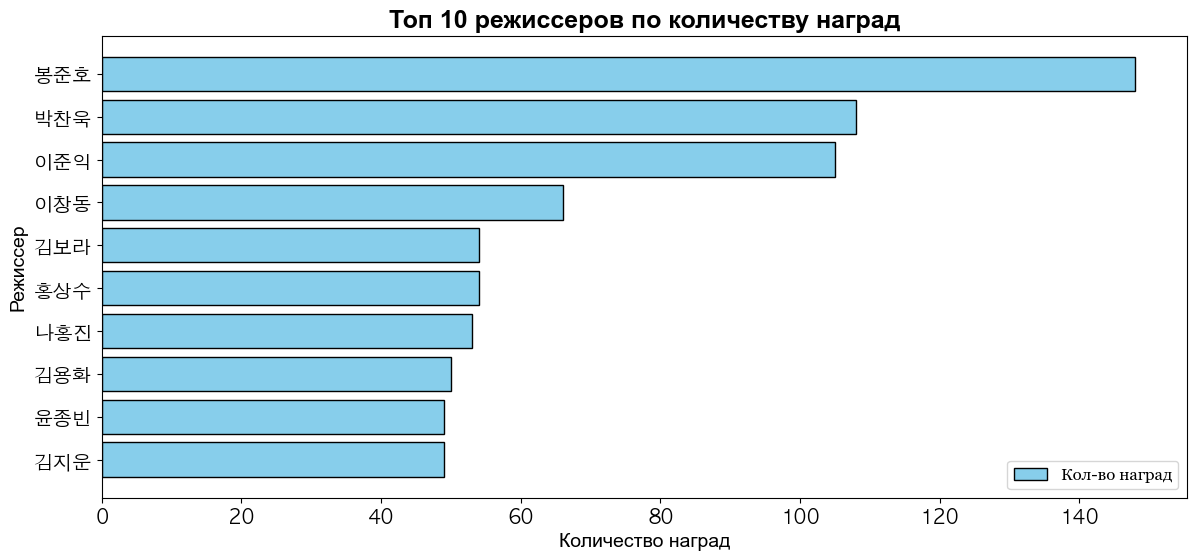

In [1133]:
custom_fonts = {
    'font.family': 'AppleGothic',
    'font.size': 14
}

legend_font = fm.FontProperties(fname='/System/Library/Fonts/Supplemental/Georgia.ttf', size=12)
font_for_axes = {'family': 'Arial', 'size': 14, 'weight': 'regular'}
font_for_title = {'family': 'Arial', 'size': 18, 'weight': 'bold'}

with plt.rc_context(rc=custom_fonts):
    plt.figure(figsize=(14, 6))
    plt.barh(top_10.index, top_10.values, color='skyblue', edgecolor='black', label='Кол-во наград')
    plt.xlabel('Количество наград', fontdict=font_for_axes)
    plt.ylabel('Режиссер', fontdict=font_for_axes)
    plt.title('Топ 10 режиссеров по количеству наград', fontdict=font_for_title)
    plt.legend(prop=legend_font)
    plt.gca().invert_yaxis()
    plt.show()

### **ЗАКОНОМЕРНОСТИ**
>  **1. Международный интерес к южнокорейскому кино**

Международный интерес к южнокорейскому кино непрерывно рос с 2000 года, достигая своего пика в 2019 году, когда было зафиксировано наибольшее количество участий корейских фильмов в международных кинофестивалях. Однако после 2019 года наблюдается спад, что может быть связано с последствиями пандемии COVID-19, когда многие фестивали были отменены или перенесены, а съемки фильмов были приостановлены.





> **2. Растущее количество наград с увеличением представленных фильмов**

С увеличением числа фильмов, ежегодно представленных на кинофестивалях, наблюдается и рост количества наград, которые они получают. Это свидетельствует о повышении качества южнокорейского кинематографа и признания международным сообществом. Количество наград продолжает расти, что подтверждает интерес к произведениям корейских режиссеров и артистов.





> **3. Корейское кино продолжает получать признание в мире**

Тенденция роста участия корейских фильмов в международных кинофестивалях и количество наград, которые они получают, подтверждает, что корейский кинематограф продолжает занимать важное место на мировой киноарене. Награды и признание на международных фестивалях становятся стимулом для новых поколений режиссеров и актеров, вдохновляя их на создание высококачественного контента.





> **4. Корреляция между лучшими режиссерами и числом наград**

Есть также положительная корреляция между количеством наград, получаемых фильмами, и режиссерами, которые входят в список топовых. Это подтверждает гипотезу, что лучшие режиссеры получают больше признания на международных фестивалях, а их фильмы часто становятся победителями. Например, режиссеры, такие как Пон Чжунхо и Хон Сансу, демонстрируют высокие результаты как по числу фильмов, так и по количеству наград.




> **5. Зависимость успеха режиссера от участия в фестивалях**

Режиссеры, чьи фильмы чаще участвуют в международных фестивалях, чаще оказываются в числе победителей. Это подтверждает теорию, что постоянное участие в международных кинофестивалях увеличивает шанс на получение наград, что связано с более широким распространением фильмов и их дальнейшей популярностью.



---

### **АНОМАЛИИ**
1. Самая значительная аномалия наблюдается в 2020-2021 годах, когда произошел резкий спад в числе участников и наград, что можно объяснить пандемией COVID-19. Это событие вызвало массовые отмены и переносы кинофестивалей, а также приостановку съемок и ограничение международных поездок. В этот период многие фильмы не были представлены на фестивалях, и это также повлияло на нормативные ожидания по наградам и количеству показов. Эта аномалия требует особого внимания при анализе данных, так как она искажает тренды, характерные для других лет.

2. Неравномерное распределение наград среди режиссеров. Хотя в целом существует корреляция между участием в фестивалях и получением наград, есть отклонения. Например, режиссеры, чьи фильмы регулярно участвуют в фестивалях, не всегда получают награды в той же пропорции. Это может указывать на погрешности в оценке качества фильмов или на влияние субъективности жюри на результаты. Такие аномалии могут повлиять на точность прогнозирования успеха фильмов на фестивалях и требуют дополнительного анализа для выявления причин.



---
### **ВЛИЯНИЕ НА ДАЛЬНЕЙШИЙ АНАЛИЗ**
* Аномалии, такие как падение активности в 2020-2021 годах, требуют специального учета в дальнейших анализах. Необходимо либо исключать эти годы из анализа трендов, либо проводить их анализ с учетом специфики этих лет.

* Фильтрация данных и удаление выбросов поможет сделать анализ более точным и исключить влияние экстремальных факторов.

* Если при анализе данных о режиссерах и фильмах в рамках ежегодных трендов наблюдаются аномалии, это может повлиять на стратегические выводы о развитии индустрии, трендах и предпочтениях зрителей. Важно корректно учитывать такие аномалии, чтобы предсказать будущие тенденции более точно.


---

## **Формулировка и проверка гипотез**

Следующая часть работы изначально была выполнена в другом блокноте, поэтому было необходимо импортировать обработанные в этом файле данные, что мы и сделали ниже.

In [1011]:
yearly_aw.to_csv('sup_table.csv')

In [1013]:

df.to_csv('fixed_data.csv')

In [1015]:
raw_data.to_csv('raw_data.csv')

Даллее мы снова обрабатывала данные, чтобы подготовить выборку для выдвижения и тестирования гипотез. 2 блокнота позже были объединены в один.

## **Обработка данных, подготовка выборки**

**1. В основе выборки будет лежать наш изначальный датасет `raw_data`**

In [1020]:
alldata = pd.read_csv('/Users/xexinette/Downloads/raw_data.csv')
alldata.head(1)

,Unnamed: 0,Year,Fest Name,Genre,Film,Director,Nomination,Award,Winner
0,0,2005,카이로 국제영화제,일반(종합),"제니, 주노",김호준,NaN,NaN,NaN


**2. Возьмем созданный на предыдущем этапе датафрейм `yearly_aw`**

Сейчас нас интересуют из него 2 колонки:
- **`Best_Director`** (**BDA**) – режиссер, получивший больше всего наград в этом году.    
- **`Most_Shown_Director`** (**MSD**) – режиссер, чьи фильмы чаще всего участвовали в фестивалях в этом году (независимо от наград).  



In [1023]:
data = pd.read_csv('/Users/xexinette/Downloads/sup_table.csv')
data.head(1)

,Year,Awards,Winners,Win_to_Aw,Rec_num,Fest_Unum,Film_UNnum,Best_Director,BDAll_num,BDA_num,BDALL_AW_Ration,BDA_Share,Most_Shown_Director,MSDW_num,MSDW_Share
0,2000,85,70,0.823529,354,122,111,박찬욱,15,13,0.866667,0.185714,이창동,20,0.18018


### **3. Создадим новые признаки:**

* **Постараемся определить `страну проведения фестивалей` хотя бы для `половины` записей.**

Для этого:

а) Сначала избавимя от дублирующихся фестивалей, которые могли появиться в результате проставленных пробелов (в кор. языке, особенно в названиях, часто допустимо ставить или не ставить пробел на усмотрение пишущего);

In [1026]:
alldata['Fest Name'] = alldata['Fest Name'].apply(lambda x: x.replace(' ', '') if isinstance(x, str) else x)

б) Соберем словарь с название стран для фестивалей по ключевым словам - названиям корейских городов;

In [1029]:
festival_to_country = {}
korean_cities = ['서울', '부산', '대구', '전주', '광주', '인천', '제주', '강릉', '대전', '대한민국']
for x in alldata['Fest Name']:
    for city in korean_cities:
        if city in x:
            festival_to_country[x] = 'South Korea'

в) Смотрим, какие фестивали из `топ-50` по числу записей о них не попали в словарь и **вручную** заносим их туда;

In [1032]:
top_50_fest = alldata['Fest Name'].value_counts().head(50).reset_index()
for i in top_50_fest['Fest Name']:
    if i not in festival_to_country.keys():
        print(i)

부천국제판타스틱영화제
대단한단편영화제
피렌체한국영화제
미쟝센단편영화제
정동진독립영화제
DMZ국제다큐멘터리영화제
파리한국영화제
청룡영화상
제천국제음악영화제
판타지아국제영화제
런던한국영화제
무주산골영화제
여성인권영화제
우디네극동영화제
인디다큐페스티발
백상예술대상
한국영화평론가협회상
뉴욕아시안영화제
인디포럼
광화문국제단편영화제
대종상영화제
부천국제애니메이션페스티벌
헝가리한국영화제
황금촬영상시상식
전북독립영화제
시체스국제판타스틱영화제
한국퀴어영화제
부일영화상
상하이국제영화제


In [1034]:
festival_to_country.update({
    '부천국제판타스틱영화제': 'South Korea',
    '케이프타운세계영화제': 'South Africa',  # некоторые фестивали не были в топ-50, но их легко было заметить при просмотре 
                                        # датасета, так что их тоже вносим для увеличения выборки
    '대단한단편영화제': 'South Korea', 
    '미쟝센단편영화제': 'South Korea',
    '정동진독립영화제': 'South Korea',
    'DMZ국제다큐멘터리영화제': 'South Korea',
    '청룡영화상': 'South Korea',
    '제천국제음악영화제': 'South Korea',
    '네팔국제영화제': 'Nepal',
    '판타지아국제영화제': 'Canada',
    '무주산골영화제': 'South Korea',
    '여성인권영화제': 'South Korea',
    '우디네극동영화제': 'Italy',
    'FairyTales퀴어영화제': 'Canada',
    '인디다큐페스티발': 'South Korea',
    '시애틀영화제': 'USA',
    '백상예술대상': 'South Korea',
    '뉴욕아시안영화제': 'USA',
    '인디포럼': 'South Korea',
    '광화문국제단편영화제': 'South Korea',
    '대종상영화제': 'South Korea',
    '부천국제애니메이션페스티벌': 'South Korea',
    '황금촬영상시상식': 'South Korea',
    '전북독립영화제': 'South Korea',
    '시체스국제판타스틱영화제': 'Spain',
    '부일영화상': 'South Korea',
    '상하이국제영화제': 'China',
    '피렌체한국영화제': 'Italy',
    '파리한국영화제': 'France',
    '런던한국영화제': 'England',
    '한국영화평론가협회상': 'South Korea',
    '헝가리한국영화제': 'Hungary',
    '한국퀴어영화제': 'South Korea'
})

len(festival_to_country) 

109

Загрузим также датасет с обработанными данными только по победителям фестивалей, запишем в датасет `df`

In [1037]:
df = pd.read_csv('/Users/xexinette/Downloads/fixed_data.csv')
df['Fest Name'] = df['Fest Name'].apply(lambda x: x.replace(' ', '') if isinstance(x, str) else x)
df.head(1)

,Unnamed: 0,Year,Fest Name,Genre,Film,Director,Award,Winner
0,17,2005,디렉터스컷어워즈,일반(종합),너는 내 운명,박진표,올해의 여자배우상,전도연


Найдем топ-3 режиссера и для них определим страны фестивалей, в которых они побеждали

In [1040]:
top_3 = list(df['Director'].value_counts().head(3).index)
top_3

['봉준호', '박찬욱', '이준익']

In [1042]:
df_top_3_dir = df[df['Director'].isin(top_3)]
df_top_3_dir['Fest_Country'] = df_top_3_dir['Fest Name'].map(festival_to_country)
missing_country = df_top_3_dir[df_top_3_dir['Fest_Country'].isna()]
missing_country['Fest Name'].unique()

array(['디렉터스컷어워즈', '홍콩아시안영화제', '춘사영화제', '칸국제영화제', '맥스무비최고의영화상', '여성영화인축제',
       '산세바스티안국제영화제', '한국영화제작가협회상', 'LA영화비평가협회상', '인도국제영화제', '아시안필름어워드',
       '마리끌레르영화제', '영국아카데미시상식', '마카오국제영화제', '아시아퍼시픽스크린어워즈',
       '오슬로필름즈프롬더사우스영화제', '제네바국제영화제', '상파울루국제영화제', '캘거리국제영화제', '판타스틱페스트',
       '토론토국제영화제', '로카르노국제영화제', '유라시아국제영화제', '시드니영화제', '아카데미시상식',
       '로테르담국제영화제', '미국배우조합상', '트롬쇠국제영화제', '골든글로브어워즈', '디스커싱필름비평가협회상'],
      dtype=object)

In [1044]:
festival_to_country.update({
    '디렉터스컷어워즈': 'South Korea',
    '홍콩아시안영화제': 'Hong Kong',
    '춘사영화제': 'South Korea',
    '칸국제영화제': 'France',
    '맥스무비최고의영화상': 'South Korea',
    '여성영화인축제': 'South Korea',
    '산세바스티안국제영화제': 'Spain',
    '한국영화제작가협회상': 'South Korea',
    'LA영화비평가협회상': 'USA',
    '인도국제영화제': 'India',
    '아시안필름어워드': 'Hong Kong',
    '마리끌레르영화제': 'South Korea',
    '영국아카데미시상식': 'England',
    '마카오국제영화제': 'China',
    '아시아퍼시픽스크린어워즈': 'Australia',
    '오슬로필름즈프롬더사우스영화제': 'Norway',
    '제네바국제영화제': 'Switzerland',
    '상파울루국제영화제': 'Brazil',
    '캘거리국제영화제': 'Canada',
    '판타스틱페스트': 'USA',
    '토론토국제영화제': 'Canada',
    '로카르노국제영화제': 'Switzerland',
    '유라시아국제영화제': 'Online',
    '시드니영화제': 'Australia',
    '아카데미시상식': 'USA',
    '로테르담국제영화제': 'Netherlands',
    '미국배우조합상': 'USA',
    '트롬쇠국제영화제': 'Norway',
    '골든글로브어워즈': 'USA',
    '디스커싱필름비평가협회상': 'Online'
})
    
len(festival_to_country)               

139

In [1046]:
alldata['Fest_Country'] = alldata['Fest Name'].map(festival_to_country)

**Итак, у нас получилось определить страну для 139 фестивалей (в том числе для топ-50 по популярности и все, где побеждали топ-3 режиссера)**


г) Сопоставляем полученые страны с данными в датасете, проверяем на пропуски через .info()

In [1049]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37665 entries, 0 to 37664
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    37665 non-null  int64 
 1   Year          37665 non-null  int64 
 2   Fest Name     37665 non-null  object
 3   Genre         37591 non-null  object
 4   Film          37520 non-null  object
 5   Director      35261 non-null  object
 6   Nomination    31872 non-null  object
 7   Award         6250 non-null   object
 8   Winner        5213 non-null   object
 9   Fest_Country  23100 non-null  object
dtypes: int64(2), object(8)
memory usage: 2.9+ MB


видим:
> *9 Festival_Country 23100 non-null object,*

*значит мы смогли определить страну проведения для `61%` (23100/37665) записей*

д) Добавим бинарный признак `Is_National` - 'Национальный / Зарубежный' фестиваль (1/0)

In [1053]:
alldata['Is_National'] = alldata['Fest_Country'].apply(lambda x: 1 if x == 'South Korea' else 0).astype(int)

* **Теперь создадим систему рангов, в соответствии с которой разделим режиссеров:**

> 1 ранг: режиссер хотя бы раз попадал в список лучших `Best_Director`;

> 2 ранг: режиссер хотя бы раз попадал в список самых часто показываемых на фестивалях `Most_Shown_Director`;

> 3 ранг: режиссер ни разу не был ни в одном из списков.

In [1056]:
best_directors = set(data['Best_Director'].dropna())
most_shown_directors = set(data['Most_Shown_Director'].dropna())

director_rank = {}
for director in most_shown_directors:
    director_rank[director] = 2
for director in best_directors:
    director_rank[director] = 1

alldata["director_rank"] = alldata["Director"].map(director_rank).fillna(3).astype(int) 
# добавим новый признак к нашему датасету

Для каждого фильма рассчитаем бинарную переменную `awarded`:
* `1` — фильм получил награду (на основе непустого поля `Winner`);
* `0` — фильм не получил награду.


In [1059]:
alldata['awarded'] = alldata['Winner'].notna().astype(int)

Избавимся от строк с пропущенными значениями стран и режиссеров

In [1062]:
alldata = alldata.dropna(subset=['Fest_Country', 'Director'])

**Теперь создадим дополнительную таблицу, в которой соберем данные по каждому фильму, а именно:**

- в `Total_Presentations` внесем общее кол-во записей об этом фильме в нашем датасете;
- в `Unique_Festivals` кол-во уникальных фестивалей, на которых фильм был представлен за все время;
- в `Unique_Years` кол-во лет, когда фильм участвовал в фестах;
- в `Director` режиссер;
- в `National_Count` сколько из фестивалей, в которых участвовал фильм, проводились в Корее;
- в `International_Count` сколько из фестивалей, в которых участвовал фильм, проводились зарубежом;
- в `Award_Count` кол-во завоеванных наград.

In [1065]:
film_counts = alldata['Film'].value_counts().reset_index()
film_counts.columns = ['Film', 'Total_Presentations']

unique_fests = alldata.groupby('Film')['Fest Name'].nunique().reset_index()
unique_fests.columns = ['Film', 'Unique_Festivals']

unique_years = alldata.groupby('Film')['Year'].nunique().reset_index()
unique_years.columns = ['Film', 'Unique_Years']

film_directors = alldata[['Film', 'Director']].drop_duplicates(subset='Film')

national_counts = alldata[alldata['Is_National'] == 1].groupby('Film').size().rename('National_Count')
international_counts = alldata[alldata['Is_National'] == 0].groupby('Film').size().rename('International_Count')
festival_origin_summary = pd.concat([national_counts, international_counts], axis=1).fillna(0).astype(int)

awards_counts = alldata[alldata['Winner'].notna()]['Film'].value_counts().reset_index()
awards_counts.columns = ['Film', 'Award_Count']

film_summary = film_counts.merge(unique_fests, on='Film').merge(unique_years, on='Film').merge(film_directors, on='Film', how='left').merge(festival_origin_summary, on='Film', how='left').merge(awards_counts, on='Film', how='left')

Совершим необходимые преобразования:
> заменим пустые значения в кол-ве наград на 0;
> посчтитаем соотношение наград к общему кол-ву записей;
> добавим в таблицу ранг режиссера.

- в `Awards_ratio` соотношение наград к участию;
- в `Director_Rank` ранг режиссера.

In [1068]:
film_summary['Award_Count'] = film_summary['Award_Count'].fillna(0).astype(int)
film_summary['Awards_ratio'] = film_summary['Award_Count'] / film_summary['Total_Presentations']
film_summary = film_summary[film_summary['Total_Presentations'] > 5]
film_summary['Director_Rank'] = film_summary['Director'].map(director_rank).fillna(3).astype(int)
film_summary = film_summary[film_summary['Award_Count'] > 5].reset_index(drop=True)
film_summary.head(1)

,Film,Total_Presentations,Unique_Festivals,Unique_Years,Director,National_Count,International_Count,Award_Count,Awards_ratio,Director_Rank
0,기생충,88,36,4,봉준호,38,50,76,0.863636,1


In [1070]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21446 entries, 2 to 37664
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     21446 non-null  int64 
 1   Year           21446 non-null  int64 
 2   Fest Name      21446 non-null  object
 3   Genre          21446 non-null  object
 4   Film           21446 non-null  object
 5   Director       21446 non-null  object
 6   Nomination     17836 non-null  object
 7   Award          4330 non-null   object
 8   Winner         3962 non-null   object
 9   Fest_Country   21446 non-null  object
 10  Is_National    21446 non-null  int64 
 11  director_rank  21446 non-null  int64 
 12  awarded        21446 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 2.3+ MB





**НАША ВЫБОРКА ГОТОВА :)**

Теперь можем переходить к выдвижению и проверке гипотез

---

## **Формулировка и проверка гипотез**

## Гипотеза №1: влияние ранга режиссера на вероятность получения награды

Мы хотим проверить, влияет ли "ранг" режиссера на вероятность получения им награды на фестивале. Будем использовать данные по фильмам режиссеров 1-го и 3-го ранга из датафрейма `alldata`, генеральная совокупность: все корейские фильмы, которые были или будут выпущены.

* дисперсия по генеральной совокупности неизвестна, поэтому будем использовать **t-статистику**;
* **мотивация**: проверка данной гипотезы позволит судить, насколько "именитость" режиссера влияет на успех картины на фестивале.


1. **Формулируем гипотезы**
<div align="center">

$$
H_0: \mu_1 = \mu_3
$$

$$
H_1: \mu_1 \ne \mu_3
$$

</div>


- **H₀ (нулевая гипотеза):**  
  Средняя вероятность получения награды у фильмов от режиссёров с рангом 1 **равна** таковой у фильмов с рангом 3.

- **H₁ (альтернативная гипотеза):**  
  Средняя вероятность **не равна** — есть статистически значимая разница между рангами.

---
                      



2. **Выбираем уровень значимости**
<div align="center">

$$
\alpha = 0.01
$$

</div>



3. **Считаем p-value**

In [1077]:
from scipy.stats import ttest_ind

rank1 = alldata[alldata['director_rank'] == 1]['awarded']
rank3 = alldata[alldata['director_rank'] == 3]['awarded']

result = ttest_ind(rank1, rank3, alternative="two-sided", equal_var=False)
result

TtestResult(statistic=31.831044796900773, pvalue=9.623770511682689e-170, df=1476.809224568856)

4. **Результаты**

- t-статистика: 31.83  

- Уровень значимости:  
  <div align="center">

  $$
  \alpha = 0.01
  $$

  </div>

- **p-value:**  
  <div align="center">

  $$
  p = 9.62 \times 10^{-170}
  $$

  </div>

---

### Вывод:

Так как:

<div align="center">

$$
p \ll \alpha
$$

</div>

мы отвергаем нулевую гипотезу и заключаем, что вероятность получения награды **значимо отличается** у фильмов режиссёров ранга 1 и ранга 3.



### Найдем средние и доверительные интервалы вероятностей режиссеров 1-го и 3-го ранга получить награду на фестивале:

In [1081]:
mean_rank1 = rank1.mean()
sigma1 = rank1.std(ddof=1)
n_rank1 = len(rank1)
conf_interval_1 = stats.t.interval(0.99, df=len(rank1)-1, loc=mean_rank1, scale=sigma1/np.sqrt(len(rank1)))

mean_rank1, conf_interval_1

(0.5874635568513119, (0.5531690170488719, 0.6217580966537519))

Мы с 99% уверенностью можем утверждать, что средняя вероятность получения награды для фильмов от режиссёров **с рангом 1** лежит в диапазоне от 55.3% до 62.1%.

In [1084]:
mean_rank3 = rank3.mean()
sigma3 = rank3.std(ddof=1)
n_rank3 = len(rank3)
conf_interval_3 = stats.t.interval(0.99, df=len(rank3)-1, loc=mean_rank3, scale=sigma3/np.sqrt(len(rank3)))

mean_rank1, conf_interval_3

(0.5874635568513119, (0.14963576580501625, 0.16297542720062602))

Мы с 99% уверенностью можем утверждать, что средняя вероятность получения награды для фильмов от режиссёров **с рангом 3** лежит в диапазоне от 15% до 16.3%.


**ИТОГ:** Судя по средним, вероятность получить награду на фестивале значительно выше у режиссеров 1-го ранга.

---

## Гипотеза №2: 
**На кол-во полученных наград фильмом (Award_Count) значительно влияет кол-во лет, на протяжении которых фильм участвует в фестивалях; кол-во уникальных фестивалей, на которых он показывается; а также место проведения фестиваля (Корея / зарубеж).**

Мы хотим проверить, какие еще факторы влияют на вероятность получить награду на фестивале. Для этого построим многофакторную регрессию.

## Многофакторная линейная Регрессия

В рамках исследования мы стремимся понять:

- Что именно влияет на успешность фильма на фестивалях?
- Достаточно ли просто часто участвовать как можно чаще, или важна уникальность и длительность присутствия на сцене?
- Какую роль играет место проведения фестивалей — в частности, есть ли различие между фестивалями, проходящими в Южной Корее и за рубежом?

Для этого будем строить многофакторную линейную регрессию по данным из датасета `film_summary`, где:
  > **целевая переменная:** `Award_Count` - кол-во наград, полученных фильмом;

  > **независимые переменные:**
        > `Unique_Festivals` - кол-во уникальных фестивалей, на которых фильм был представлен за все время;
        > `National_Count` -  сколько из фестивалей, в которых участвовал фильм, проводились в Корее; `International_Count` - сколько из фестивалей, в которых участвовал фильм, проводились зарубежом; `Unique_Years` - кол-во лет, когда фильм участвовал в фестах;

---


**Нулевая гипотеза (H₀):** Все коэффициенты при признаках равны нулю — признаки не влияют на Awards_ratio.

<div align="center">

$$
H_0: \beta_1 = \beta_2 = \beta_3 = \beta_4 = 0 \\
$$

</div>

**Альтернативная гипотеза (H₁):** Хотя бы один из коэффициентов регрессии значимо отличается от нуля, то есть хотя бы один признак влияет на Awards_ratio.

<div align="center">

$$
H_1: \text{Хотя бы один из } \beta_i \ne 0
$$

</div>



**Сначала обучим модель, для обучения возьмем 70% данных**

In [1094]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm

X = film_summary[['Unique_Festivals', 'National_Count', 'International_Count', 'Unique_Years']] 
y = film_summary['Award_Count'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, X_train_const).fit()
model.params



const                  2.247593
Unique_Festivals      -0.755522
National_Count         1.099836
International_Count    1.156117
Unique_Years          -0.546052
dtype: float64

**А теперь протестируем модель и рассчитаем метрики:**

In [1097]:
y_pred = model.predict(X_test_const)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)

MSE: 6.1603771418075715
MAE: 1.8528392735098733
R²: 0.7292423140564801




**Проведем тест Уальда и посмотрим F-статистику**

In [1100]:
hypothesis = 'Unique_Festivals = 0, National_Count = 0, International_Count = 0, Unique_Years = 0'
wald_result = model.wald_test(hypothesis)
print(wald_result)


<F test: F=array([[536.9247507]]), p=1.2626823512944882e-66, df_denom=100, df_num=4>


## Результаты
* **F-statistic:**	1225.89
* **p** = 4.16e-271


Т.к. p-value меньше заданного уровня значимости 0.01, мы отвергаем нулевую гипотезу о том, что все 4 независимых фактора незначимы одновременно и принимаем, что хотя бы один из них оказывает статистически значимое влияние на вероятность успеха фильма.

**Обратимся к полученным коэффициентам:**
> **const:**                  -0.444797;

не интерпретируем буквально

> **Unique_Festivals:**      -0.855655;

Чем больше уникальных фестивалей, тем меньше наград. Возможно, эффект "распыления" (много показов, но нецелевых).

> **National_Count:**         1.209061;

Каждый показ фильма на национальном фестивале связан в среднем с `+1.21` награды.

> **International_Count:**    1.257510;

Каждый показ на международном фестивале даёт в среднем `+1.26` награды.

> **Unique_Years:**          -0.432398.

Чем больше лет фильм крутится на фестивалях, тем меньше наград — вероятно, устаревание или снижение новизны.

**ИТОГ: да, коэффициенты небольшие, но статистически значимые.**

Благодаря полученным инсайтам мы может сделать некоторые выводы об опыте презентации корейских кинокартин на домащней и зарубежной арене:



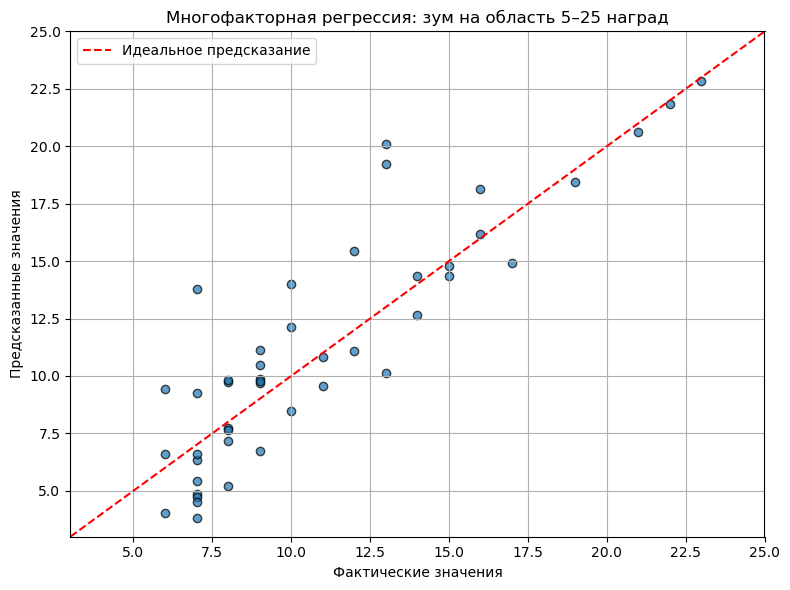

In [1105]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolor='k')
plt.plot([0, 40], [0, 40], 'r--', label='Идеальное предсказание')

plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения')
plt.title('Многофакторная регрессия: зум на область 5–25 наград')
plt.xlim(3, 25)
plt.ylim(3, 25)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Выводы

Согласно результатам регрессии и F-тесту Уальда (F = 49.77, p < 0.0001), модель в целом является значимой, и хотя бы один из факторов влияет на результат. Таким образом, гипотеза №2 подтверждается.

* Все четыре переменные оказались статистически значимыми (p-value < 0.01);
* Больше ≠ лучше для Unique_Festivals и Unique_Years — тут, похоже, переэкспонирование может снижать шанс на награду.

Для улучшения модели, можно поиграться с кол-вом факторов, добавить также категориальный признак (ранг режиссера) и попробовать построить логистическую регрессию, или попробовать изменить масштаб выборки.

## Интерпретация результатов

In [1113]:
top_directors_domestic = alldata[(alldata['Is_National'] == 1) & (alldata['awarded'] == 1)]['Director'].value_counts().reset_index()
top_directors_domestic.columns = ['Director', 'Award_num']
top_directors_domestic = top_directors_domestic[:10]

In [1115]:
top_directors_domestic

,Director,Award_num
0,봉준호,105
1,이준익,102
2,박찬욱,93
3,김용화,50
4,이창동,50
5,윤종빈,47
6,나홍진,47
7,류승완,46
8,최동훈,45
9,장훈,44


In [1117]:
top_directors_foreign = alldata[(alldata['Is_National'] == 0) & (alldata['awarded'] == 1)]['Director'].value_counts().reset_index()
top_directors_foreign.columns = ['Director', 'Award_num']
top_directors_foreign = top_directors_foreign[:10]

In [1119]:
top_directors_foreign

,Director,Award_num
0,봉준호,43
1,박찬욱,15
2,이창동,9
3,김지운,6
4,홍상수,6
5,홍의정,5
6,이준익,5
7,연상호,4
8,장준환,4
9,이수진,4


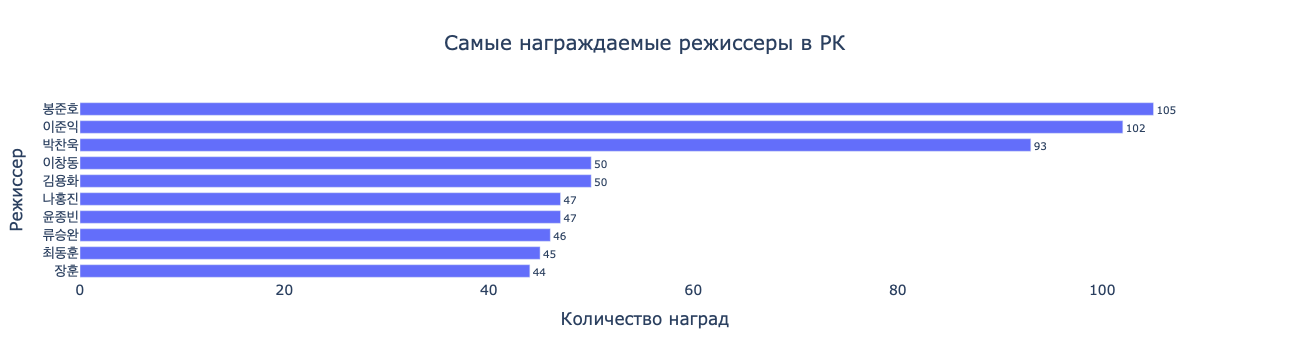

In [1121]:
import plotly.express as px
fig = px.bar(
    top_directors_domestic,
    x='Award_num',
    y='Director',
    orientation='h',
    title='Самые награждаемые режиссеры в РК',
    labels={'Award_num': 'Количество наград', 'Director': 'Режиссер'},
    text='Award_num'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    plot_bgcolor='white',
    title_x=0.5,
    font=dict(size=14),
    bargap=0.3
)

fig.update_traces(textposition='outside')

fig.show()

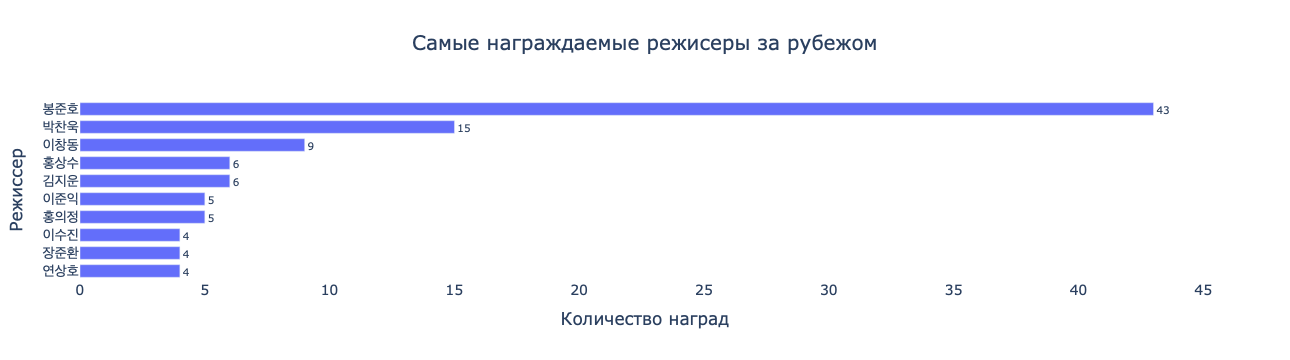

In [1123]:
fig = px.bar(
    top_directors_foreign,
    x='Award_num',
    y='Director',
    orientation='h',
    title='Самые награждаемые режисеры за рубежом',
    labels={'Award_num': 'Количество наград', 'Director': 'Режиссер'},
    text='Award_num'
)

fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    plot_bgcolor='white',
    title_x=0.5,
    font=dict(size=14),
    bargap=0.3
)

fig.update_traces(textposition='outside')

fig.show()

In [1125]:
film_summary[:10]

,Film,Total_Presentations,Unique_Festivals,Unique_Years,Director,National_Count,International_Count,Award_Count,Awards_ratio,Director_Rank
0,기생충,88,36,4,봉준호,38,50,76,0.863636,1
1,올드보이,48,21,8,박찬욱,39,9,37,0.770833,1
2,추격자,40,21,6,나홍진,32,8,29,0.725000,1
3,공작,39,21,4,윤종빈,29,10,27,0.692308,1
4,살인의 추억,39,20,6,봉준호,28,11,24,0.615385,1
5,아가씨,36,26,4,박찬욱,15,21,23,0.638889,1
6,변호인,35,14,2,양우석,30,5,25,0.714286,1
7,괴물,34,20,9,류성규,25,9,19,0.558824,3
8,마더,33,21,7,봉준호,24,9,18,0.545455,1
9,벌새,33,22,3,김보라,27,6,21,0.636364,3


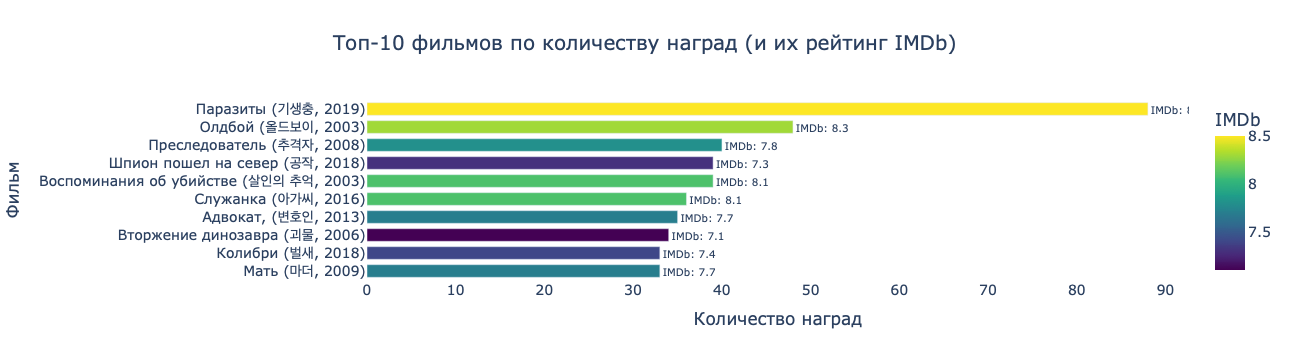

In [1128]:
import plotly.express as px
import pandas as pd

# Пример данных (замени на свои реальные значения)
data = {
    'Title': [
        'Паразиты (기생충, 2019)', 'Олдбой (올드보이, 2003)', 'Преследователь (추격자, 2008)', 'Воспоминания об убийстве (살인의 추억, 2003)', 'Шпион пошел на север (공작, 2018)',
        'Служанка (아가씨, 2016)', 'Адвокат, (변호인, 2013)', 'Вторжение динозавра (괴물, 2006)', 'Мать (마더, 2009)', 'Колибри (벌새, 2018)'
    ],
    'Awards': [88, 48, 40, 39, 39, 36, 35, 34, 33, 33],
    'IMDb_Rating': [8.5, 8.3, 7.8, 8.1, 7.3, 8.1, 7.7, 7.1, 7.7, 7.4],
    'Description': [
        'Описание A', 'Описание B', 'Описание C', 'Описание D', 'Описание E',
        'Описание F', 'Описание G', 'Описание H', 'Описание I', 'Описание J'
    ]
}

df = pd.DataFrame(data)
df = df.sort_values(by='Awards', ascending=True)

# Построение графика
fig = px.bar(
    df,
    x='Awards',
    y='Title',
    orientation='h',
    color='IMDb_Rating',
    text='IMDb_Rating',
    hover_data={'Description': True, 'IMDb_Rating': True, 'Awards': True},
    color_continuous_scale='Viridis',
    title='Топ-10 фильмов по количеству наград (и их рейтинг IMDb)',
    labels={'Awards': 'Количество наград', 'Title': 'Фильм', 'IMDb_Rating': 'Рейтинг IMDb'}
)

# Настройка внешнего вида
fig.update_layout(
    title_x=0.5,
    plot_bgcolor='white',
    font=dict(size=14),
    yaxis=dict(categoryorder='total ascending'),
    bargap=0.3,
    coloraxis_colorbar=dict(title='IMDb')
)

# Показываем рейтинг рядом с полосками
fig.update_traces(texttemplate='IMDb: %{text}', textposition='outside')

fig.show()


## **Общие выводы**

**1. Экстремальное кино действительно востребовано**

→ Актуальность темы курсовой работы подтверждена: фильмы с нестандартными, провокационными или шокирующими элементами находят отклик у аудитории и жюри фестивалей.


**2. Репутация режиссера влияет на шанс успешности фильма**

→ "Молодым" и менее известным авторам объективно труднее получить награды — именитость режиссёра оказывает статистически значимое влияние на результат.


**3. Целевые показы (фестивальные стратегии) важнее случайного успеха**

→ Успешные фильмы чаще демонстрируются на подходящих платформах и заранее ориентированы на фестивали, что подчёркивает важность продуманного позиционирования.